# Convolutional Neural Network Example



# Theory

# Convolution
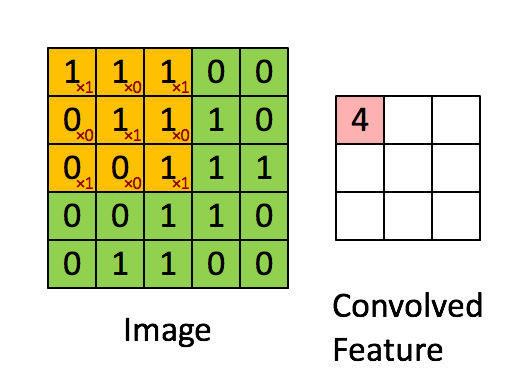


In [13]:
#Filter=>
import numpy
numpy.array([1,0,1,0,1,0,1,0,1]).reshape(3,3)
filter=numpy.array([1,0,1,0,1,0,1,0,1]).reshape(3,3)
filter

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

# Pooling

Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

This is done to in part to help over-fitting by providing an abstracted form of the representation. 
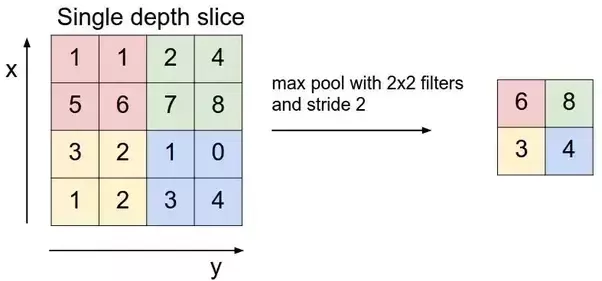

## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [3]:
from __future__ import division, print_function, absolute_import

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [15]:
# Training Parameters
learning_rate = 0.001
num_steps = 2000
batch_size = 128

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.25 # Dropout, probability to drop a unit

In [5]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out

In [14]:
 # TF Estimator input is a dict, in case of multiple inputs
 x =mnist.train.images
 print(x.shape)
 # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
 # Reshape to match picture format [Height x Width x Channel]
 # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
 x = tf.reshape(x, shape=[-1, 28, 28, 1])
 print("Data")
 print("Batch Size, Height, Width, Channel ->>", x.shape)

 # Convolution Layer with 32 filters and a kernel size of 5 replace channel to filters
 conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
 print("Data->Conv1")
 print("Batch Size, Height-kernel size+1, Width-kernel size+1, filters -->",conv1.shape)
 # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
 conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
 print("Data->Conv1->maxpooling1")
 print("Batch Size, (Height-kernel size+1)/2, (Width-kernel size+1)/2, filters -->",conv1.shape)
 # Convolution Layer with 64 filters and a kernel size of 3
 conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
 print(conv2.shape)
 # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
 conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
 print(conv2.shape)

 # Flatten the data to a 1-D vector for the fully connected layer
fc1 = tf.contrib.layers.flatten(conv2)
print(fc1.shape)

        # Fully connected layer (in tf contrib folder for now)
fc1 = tf.layers.dense(fc1, 1024)
print(fc1.shape)
        # Apply Dropout (if is_training is False, dropout is not applied)
fc1 = tf.layers.dropout(fc1, rate=dropout, training=True)
print(fc1.shape)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, 10)
        out

IndentationError: unexpected indent (<ipython-input-14-bca499952a71>, line 35)


Clearly, CNN is more efficient in terms of memory and complexity. Imagine NNs and CNNs with billions of neurons, then CNNs would be less complex and saves memory compared to the NN.

#why pooling ??
Pooling Layer. It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting.

In [6]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True, is_training=False)
    
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean
    (tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [44]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Dell-pc\\AppData\\Local\\Temp\\tmpmv84iptz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D2C55F7320>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Dell-pc\AppData\Local\Temp\tmpfqag4ihs\model.ckpt.
INFO:tensorflow:loss = 2.33051, step = 1
INFO:tensorflow:global_step/sec: 5.54633
INFO:tensorflow:loss = 0.128465, step = 101 (18.032 sec)
INFO:tensorflow:global_step/sec: 5.777
INFO:tensorflow:loss = 0.0301355, step = 201 (17.312 sec)
INFO:tensorflow:global_step/sec: 5.18827
INFO:tensorflow:loss = 0.0618365, step = 301 (19.272 sec)
INFO:tensorflow:global_step/sec: 5.59801
INFO:tensorflow:loss = 0.0353905, step = 401 (17.863 sec)
INFO:tensorflow:global_step/sec: 6.207
INFO:tensorflow:loss = 0.0889071, step = 501 (16.111 sec)
INFO:tensorflow:global_step/sec: 6.27891
INFO:tensorflow:loss = 0.0366355, step = 601 (15.926 sec)
INFO:tensorflow:global_step/sec: 6.30072
INFO:tensorflow:loss = 0.0274934, step = 701 (15.885 sec)
INFO:tensorflow:global_step/sec: 6.26944
INFO:tensorflow:loss = 0.00668287, step = 801 (15.936 sec)
INFO:tensorflow:globa

In [9]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-05-07-22:20:04
INFO:tensorflow:Restoring parameters from C:\Users\Dell-pc\AppData\Local\Temp\tmpfqag4ihs\model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-05-07-22:20:08
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9876, global_step = 2000, loss = 0.0429686


{'accuracy': 0.98760003, 'global_step': 2000, 'loss': 0.042968553}

INFO:tensorflow:Restoring parameters from /tmp/tmpdhd6F4/model.ckpt-2000


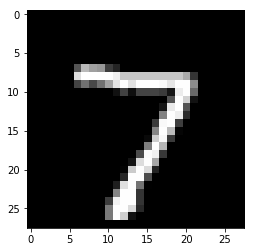

Model prediction: 7


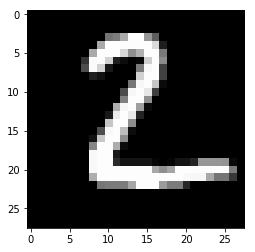

Model prediction: 2


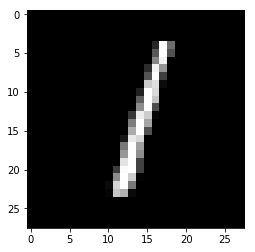

Model prediction: 1


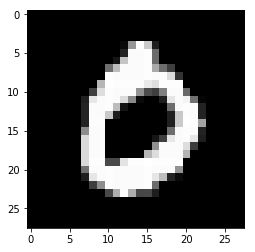

Model prediction: 0


In [8]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])